In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact
import glob

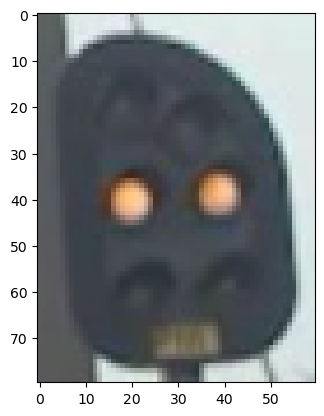

In [21]:
img_bgr = cv2.imread('images/GOOD_TRACK_PU_1_AND_2---6_6496_0.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)

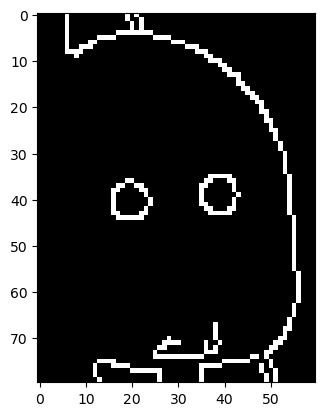

In [22]:
img = cv2.resize(img, (60,80), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img ,cv2.COLOR_RGB2HSV)
v_img = img[:,:,2]
edges = cv2.Canny(v_img, 100, 250)
plt.imshow(edges, cmap='gray')

plt.savefig('edges.png')

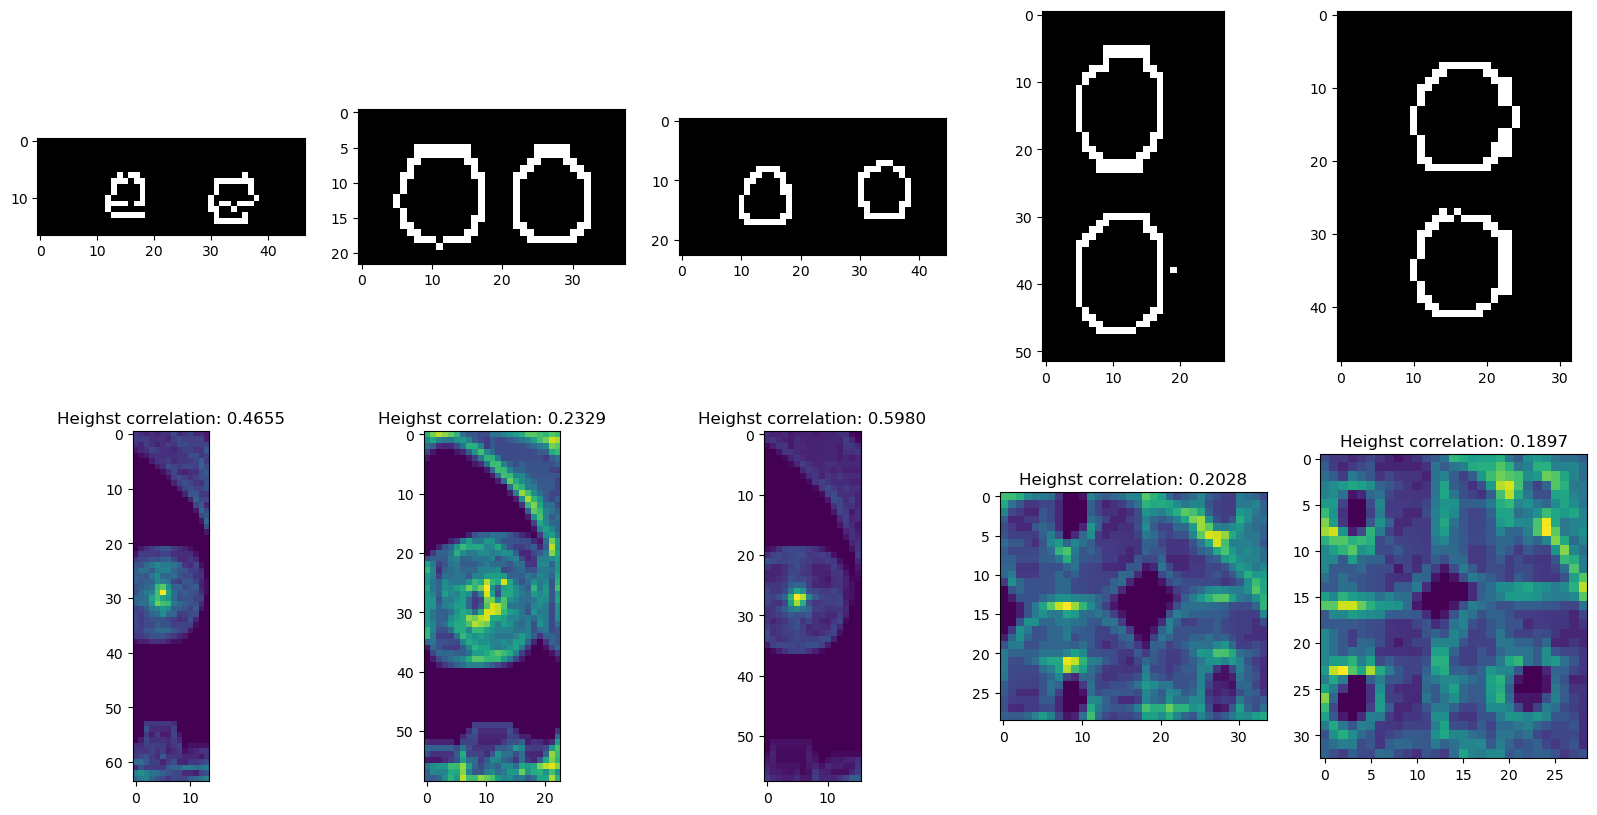

In [23]:
template_paths = glob.glob('templates/*.png')

fig, axes = plt.subplots(2, len(template_paths), figsize=(20, 10))

for i, template_path in enumerate(template_paths):
    template = cv2.imread(template_path, 0)
    
    result = cv2.matchTemplate(edges, template, cv2.TM_CCORR_NORMED)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    axes[1, i].set_title(f'Heighst correlation: {max_val:.4f}')
    
    axes[0, i].imshow(template, cmap='gray')
    axes[1, i].imshow(result)

plt.savefig('test.png')
plt.show()

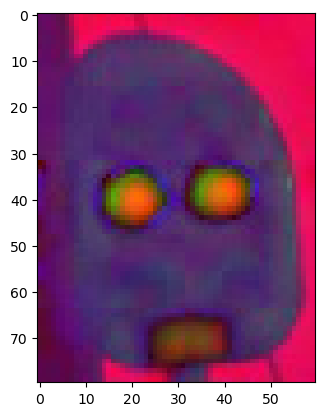

In [26]:
img_hsv = cv2.imread('hsi0025.jpg')
img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2RGB)
plt.imshow(img_hsv)

plt.savefig('hsv_img.png')

In [29]:
img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

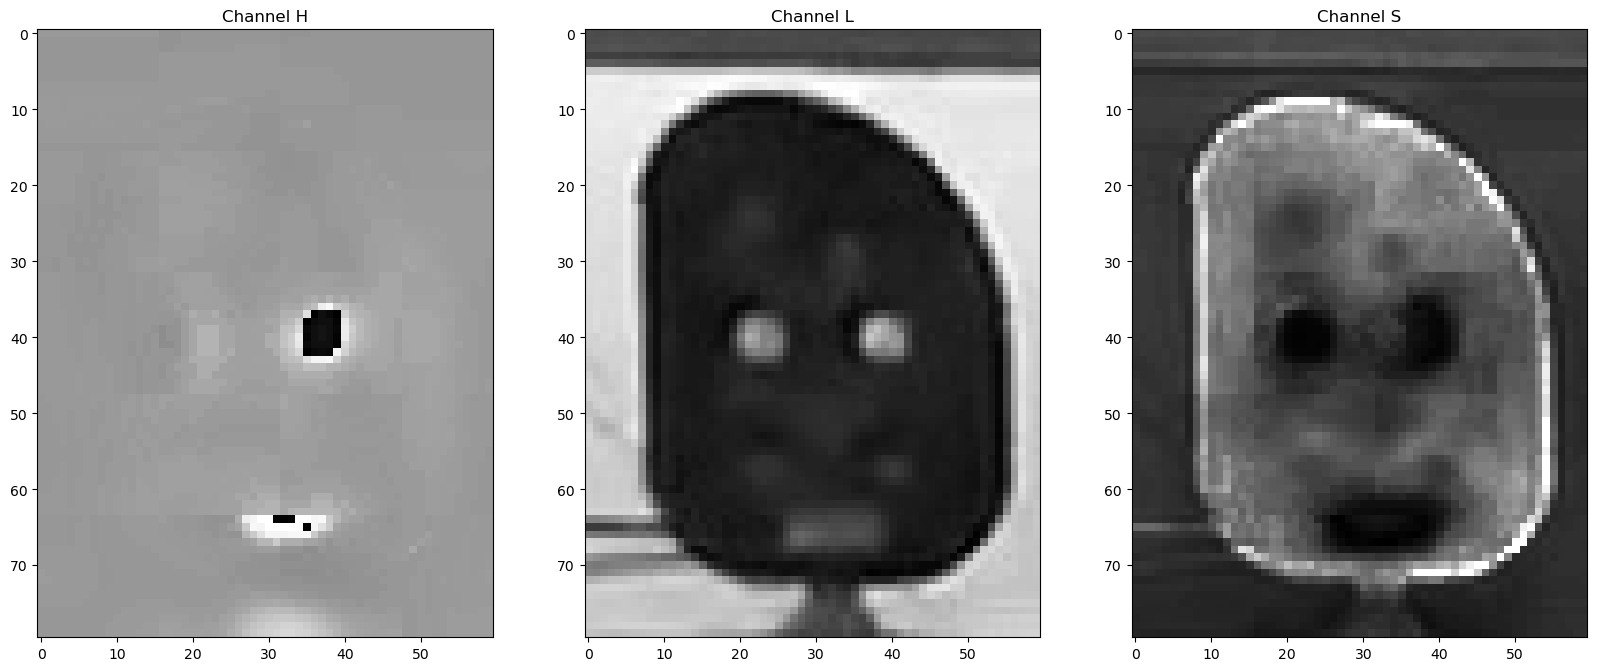

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

for i in range(3):
    ax[i].imshow(img_hls[:, :, i], cmap='gray')
    ax[i].set_title(f"Channel {['H','L','S'][i]}")
plt.show()

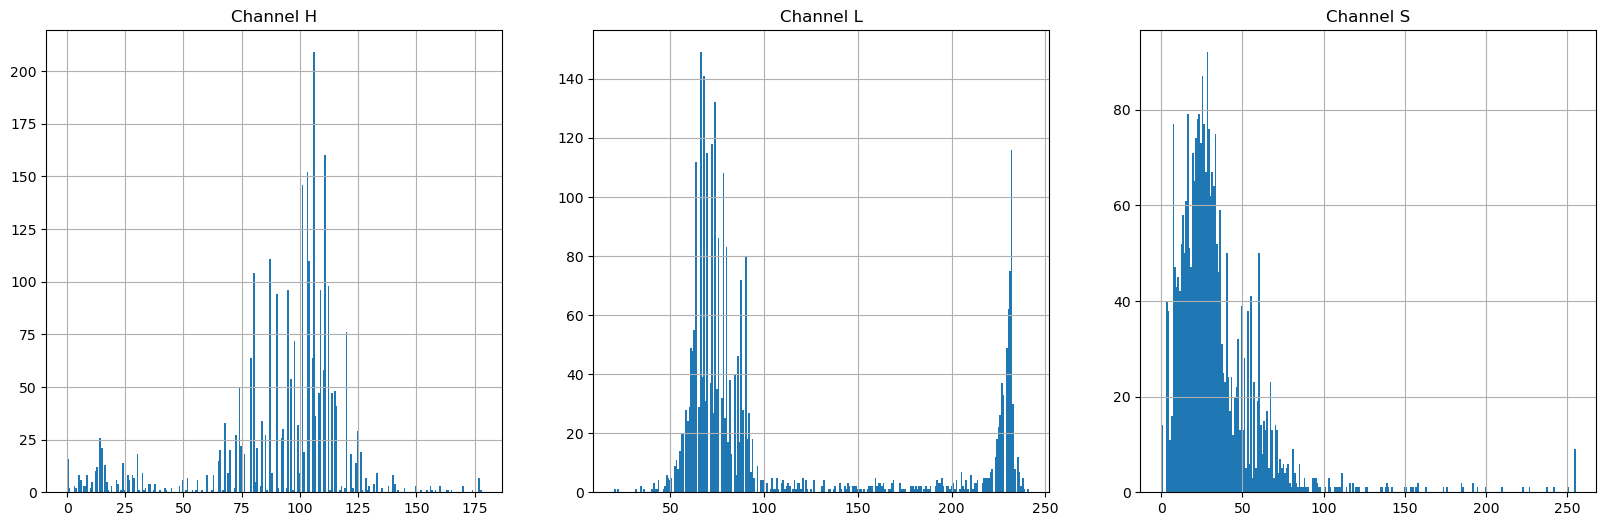

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i in range(3):
    ax[i].hist(img_hls[:, :, i].flatten(), bins=256)
    ax[i].set_title(f"Channel {['H','L','S'][i]}")
    ax[i].grid()
plt.show()

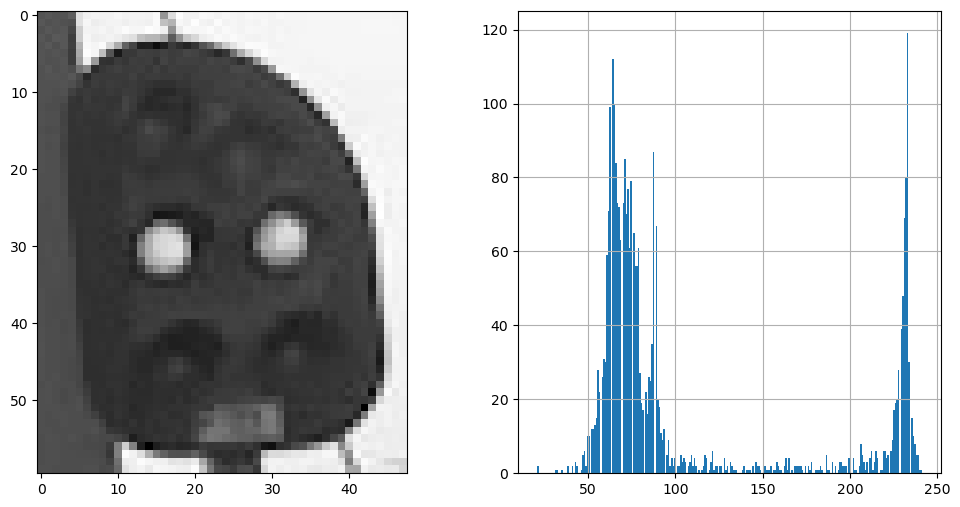

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_gray, cmap='gray')

ax[1].hist(img_gray.flatten(), bins=256)
ax[1].grid()

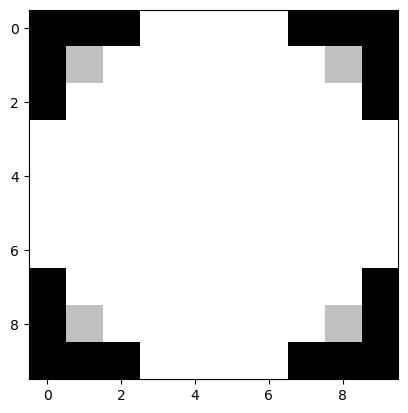

In [38]:
template = cv2.imread('circle.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

template = cv2.resize(template, (10, 10))

plt.imshow(template, cmap='gray')

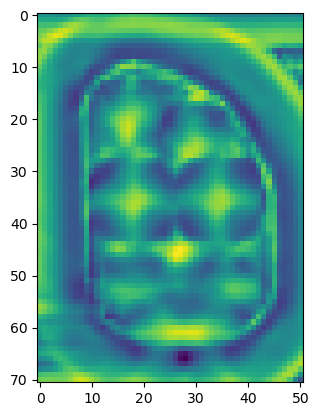

In [40]:
template_matching_image = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

plt.imshow(template_matching_image)

In [41]:
@interact(threshold=(-1.0, 1.0, 0.01))
def update(threshold=0.0):
    plt.imshow(template_matching_image > threshold, cmap='gray')

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, min=-1.0, step=0.01), Output())…

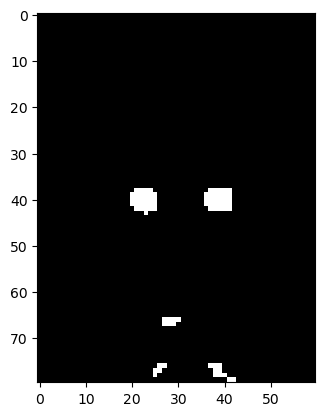

In [31]:
mask = cv2.inRange(img_hls, (0, 70, 0), (170, 180, 25))
#mask = cv2.inRange(img_hls, (9, 202, 0), (255, 255, 255))
#mask = cv2.inRange(img_hls, (0, 86, 81), (55, 255, 255))

plt.imshow(mask, cmap='gray')

In [8]:
@interact(h_bot=(0, 255, 1), h_top=(0, 255, 1), l_bot=(0, 255, 1), l_top=(0, 255, 1), s_bot=(0, 255, 1), s_top=(0, 255, 1))
def update(h_bot=0, h_top=255, l_bot=0, l_top=255, s_bot=0, s_top=255):
    mask = cv2.inRange(img_hls, (h_bot, l_bot, s_bot), (h_top, l_top, s_top))
    plt.imshow(mask, cmap='gray')

interactive(children=(IntSlider(value=0, description='h_bot', max=255), IntSlider(value=255, description='h_to…

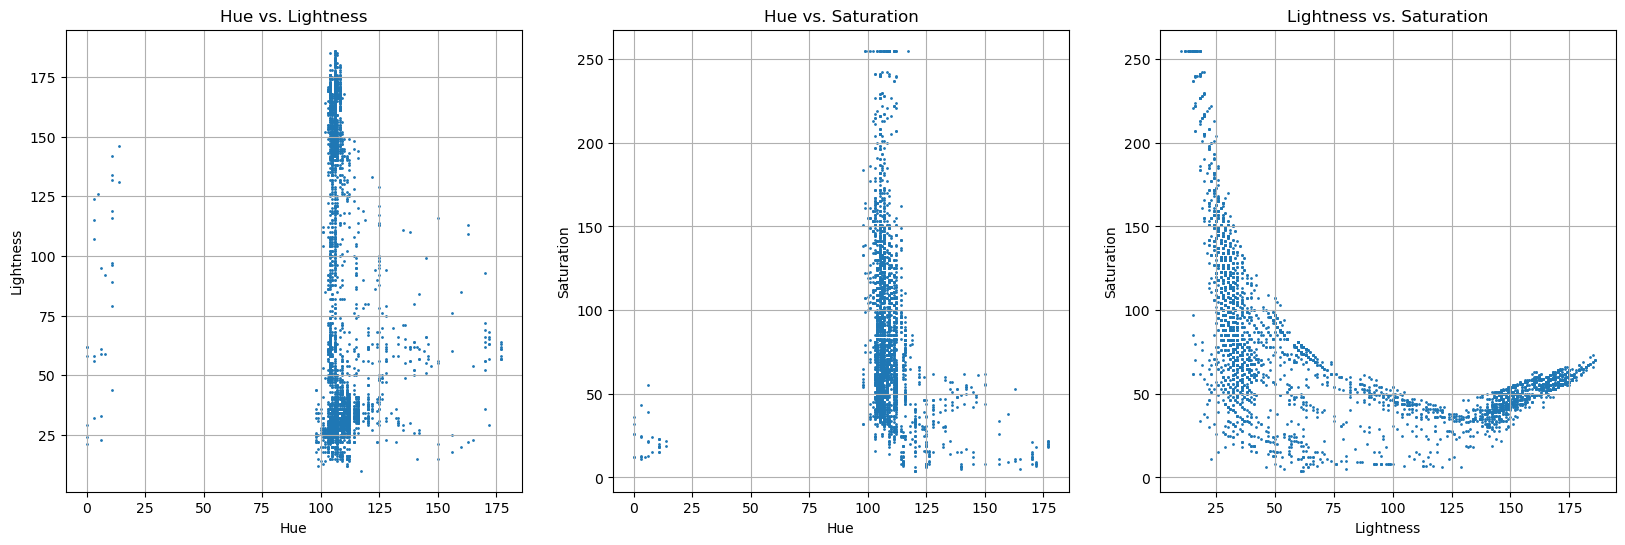

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].scatter(img_hls[:, :, 0].flatten(), img_hls[:, :, 1].flatten(), s=1)
ax[0].set_title("Hue vs. Lightness")
ax[0].set_xlabel("Hue")
ax[0].set_ylabel("Lightness")

ax[1].scatter(img_hls[:, :, 0].flatten(), img_hls[:, :, 2].flatten(), s=1)
ax[1].set_title("Hue vs. Saturation")
ax[1].set_xlabel("Hue")
ax[1].set_ylabel("Saturation")

ax[2].scatter(img_hls[:, :, 1].flatten(), img_hls[:, :, 2].flatten(), s=1)
ax[2].set_title("Lightness vs. Saturation")
ax[2].set_xlabel("Lightness")
ax[2].set_ylabel("Saturation")


for i in range(3):
    ax[i].grid()

plt.show()

In [32]:
masked = img_hls[np.where(mask != 0)]

h_masked = masked[:, 0]
l_masked = masked[:, 1]
s_masked = masked[:, 2]

In [33]:
@interact(i=(-180, 180, 0.1), j=(-180, 180, 0.1))
def update(i=0, j=0):
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.scatter3D(img_hls[:, :, 0].flatten(), img_hls[:, :, 1].flatten(), img_hls[:, :, 2].flatten(), s=10)
    ax.scatter3D(h_masked, l_masked, s_masked, c='red', s=20)
    ax.set_xlabel('Hue')
    ax.set_ylabel('Lightness')
    ax.set_zlabel('Saturation')
    ax.view_init(i, -j)

interactive(children=(FloatSlider(value=0.0, description='i', max=180.0, min=-180.0), FloatSlider(value=0.0, d…